# CME538 - Introduction to Data Science
## Lecture 7.2 - Feature Engineering

1. [Categorical Encoding](#section1)
2. [Binning](#section2)
3. [Transformations](#section3)
4. [Polynomial Features](#section4)
4. [Datetime](#section5)
4. [Text Splitting](#section6)

## Setup Notebook

In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

<a id='section1'></a>
# Categorical Encoding

In [2]:
data = pd.DataFrame(
    {'age': [34, 67, 45, 65, 49], 
     'salary': [76000, 45000, 92000, 103000, 120000],
     'country': ['UK', 'Canada', 'Canada', 'Norway', 'Iran']}
)
data.head()

,age,salary,country
0,34,76000,UK
1,67,45000,Canada
2,45,92000,Canada
3,65,103000,Norway
4,49,120000,Iran


In [3]:
data_codes = data.copy()
data_codes['country'] = \
    data_codes['country'].astype('category').cat.codes
data_codes.head()

,age,salary,country
0,34,76000,3
1,67,45000,0
2,45,92000,0
3,65,103000,2
4,49,120000,1


In [4]:
data.head()

,age,salary,country
0,34,76000,UK
1,67,45000,Canada
2,45,92000,Canada
3,65,103000,Norway
4,49,120000,Iran


In [5]:
pd.get_dummies(data, 
               columns=['country'], 
               prefix='c')

,age,salary,c_Canada,c_Iran,c_Norway,c_UK
0,34,76000,False,False,False,True
1,67,45000,True,False,False,False
2,45,92000,True,False,False,False
3,65,103000,False,False,True,False
4,49,120000,False,True,False,False


In [6]:
pd.get_dummies(data, 
               columns=['country'], 
               prefix='c',
               drop_first=True)

,age,salary,c_Iran,c_Norway,c_UK
0,34,76000,False,False,True
1,67,45000,False,False,False
2,45,92000,False,False,False
3,65,103000,False,True,False
4,49,120000,True,False,False


In [7]:
data2 = pd.DataFrame(
    {'breed': ['bulldog', 'poodle', 'poodle']}
)
data2.head()

,breed
0,bulldog
1,poodle
2,poodle


In [8]:
pd.get_dummies(data2, 
               columns=['breed'], 
               prefix='c')

,c_bulldog,c_poodle
0,True,False
1,False,True
2,False,True


In [9]:
pd.get_dummies(data2, 
               columns=['breed'], 
               prefix='c',
               drop_first=True)

,c_poodle
0,False
1,True
2,True


In [10]:
data3 = pd.DataFrame(
    {'education': ['jk', 'sk', 'elementary', 
                   'highschool', 'college']}
)
data3.head()

,education
0,jk
1,sk
2,elementary
3,highschool
4,college


In [11]:
mapper = {'jk': 1, 'sk': 2, 
          'elementary': 3, 'highschool': 4,
          'college': 5}
mapper

{'jk': 1, 'sk': 2, 'elementary': 3, 'highschool': 4, 'college': 5}

In [12]:
data3['education_encoded'] = \
    data3['education'].replace(mapper)
data3.head()

,education,education_encoded
0,jk,1
1,sk,2
2,elementary,3
3,highschool,4
4,college,5


<a id='section2'></a>
# Binning
## Numerical Data

In [13]:
data5 = pd.DataFrame(
    {'citizen_id': [16568, 28345, 38712, 41124, 
                    59653, 60006, 72365, 81254],
     'traffic_tickets': [0, 2, 1, 0, 4, 6, 2, 1]}
)
data5

,citizen_id,traffic_tickets
0,16568,0
1,28345,2
2,38712,1
3,41124,0
4,59653,4
5,60006,6
6,72365,2
7,81254,1


In [14]:
data5['binary_ticket'] = 0
data5['binary_ticket'][data5['traffic_tickets'] > 0] = 1
data5

,citizen_id,traffic_tickets,binary_ticket
0,16568,0,0
1,28345,2,1
2,38712,1,1
3,41124,0,0
4,59653,4,1
5,60006,6,1
6,72365,2,1
7,81254,1,1


In [15]:
data5['bin_ticket'] = pd.cut(
    data5['traffic_tickets'],
    bins=[-np.inf, 0, 2, np.inf],
    labels=[1, 2, 3]
)
data5

,citizen_id,traffic_tickets,binary_ticket,bin_ticket
0,16568,0,0,1
1,28345,2,1,2
2,38712,1,1,2
3,41124,0,0,1
4,59653,4,1,3
5,60006,6,1,3
6,72365,2,1,2
7,81254,1,1,2


In [16]:
mpg = pd.read_csv('auto-mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Text(0, 0.5, 'Count')

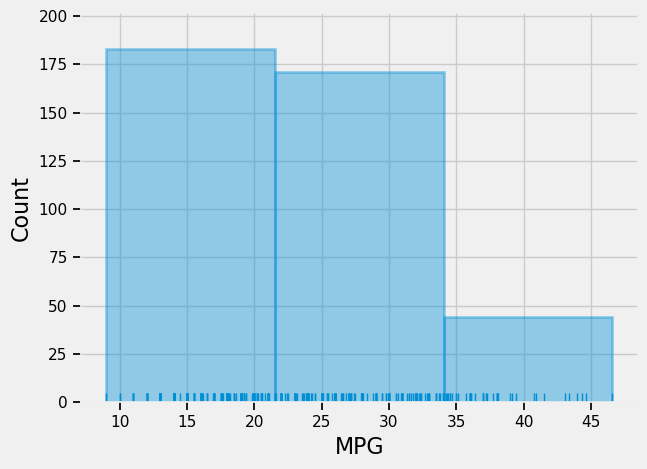

In [17]:
ax = sns.distplot(mpg['mpg'], rug=True,
                  kde=False, bins=3,
                  hist_kws=dict(edgecolor='#008fd5', 
                                linewidth=2))
ax.set_xlabel('MPG', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

Text(0, 0.5, 'Count')

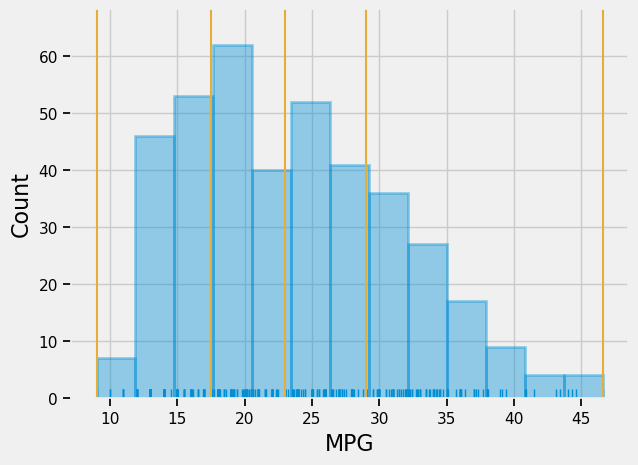

In [18]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = mpg['mpg'].quantile(quantile_list)
quantiles
ax = sns.distplot(mpg['mpg'], rug=True,
                  kde=False,
                  hist_kws=dict(edgecolor='#008fd5', 
                                linewidth=2))
for quantile in quantiles:
    ax.axvline(quantile, color='#e5ae38')
ax.set_xlabel('MPG', fontsize=16)
ax.set_ylabel('Count', fontsize=16)

## Categorical Data

In [19]:
data4 = pd.DataFrame(
    {'country': ['Canada', 'Norway', 'Iran', 
                 'South Africa', 'China', 'Turkey', 
                 'Morocco']}
)
data4

,country
0,Canada
1,Norway
2,Iran
3,South Africa
4,China
5,Turkey
6,Morocco


In [20]:
conditions = [
    data4['country'].str.contains('Canada'),
    data4['country'].str.contains('Norway'),
    data4['country'].str.contains('Iran'),
    data4['country'].str.contains('South Africa'),
    data4['country'].str.contains('China'),
    data4['country'].str.contains('Turkey'),
    data4['country'].str.contains('Morocco')
]
choices = ['North America', 'Europe', 'Asia', 'Africa', 
           'Asia', 'Asia', 'Africa']
data4['continent'] = np.select(conditions, choices, 
                               default='Other')
data4

,country,continent
0,Canada,North America
1,Norway,Europe
2,Iran,Asia
3,South Africa,Africa
4,China,Asia
5,Turkey,Asia
6,Morocco,Africa


Add a column representing the tip percentage.

<a id='section3'></a>
# Transformations

In [21]:
air_quality = pd.read_csv('air_quality.csv', index_col=0).dropna()
air_quality.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7


In [22]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(air_quality[['Temp']], air_quality[['Ozone']])
y_fitted = linear_model.predict(air_quality[['Temp']])

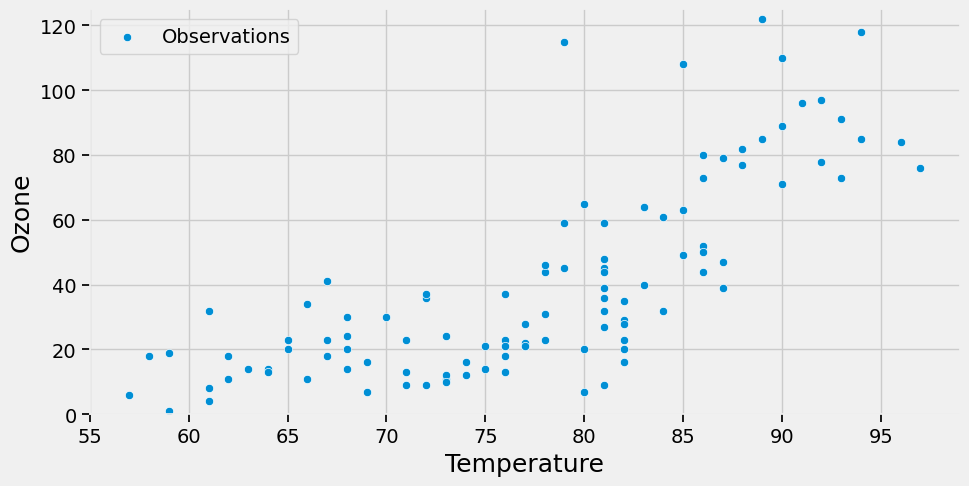

In [24]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = air_quality['Temp'], y = air_quality['Ozone'], label='Observations')
# sns.lineplot(x = air_quality['Temp'], y = y_fitted.flatten(), 
#              color='#fc4f30', ax=ax)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Temperature', fontsize=18)
ax.set_ylabel('Ozone', fontsize=18)
ax.set_ylim([0, 125])
ax.legend(fontsize=14)
plt.show()

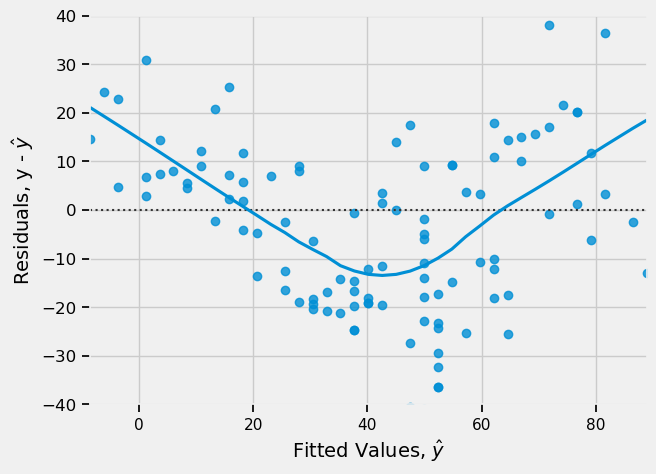

In [25]:
ax = sns.residplot(x = y_fitted.flatten(), 
              y = air_quality['Ozone'], 
              lowess=True)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Fitted Values, $\^{y}$', fontsize=14)
ax.set_ylabel('Residuals, y - $\^{y}$', fontsize=14)
ax.set_ylim([-40, 40]);

In [26]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(air_quality[['Temp']], np.log(air_quality[['Ozone']]))
y_fitted = linear_model.predict(air_quality[['Temp']])

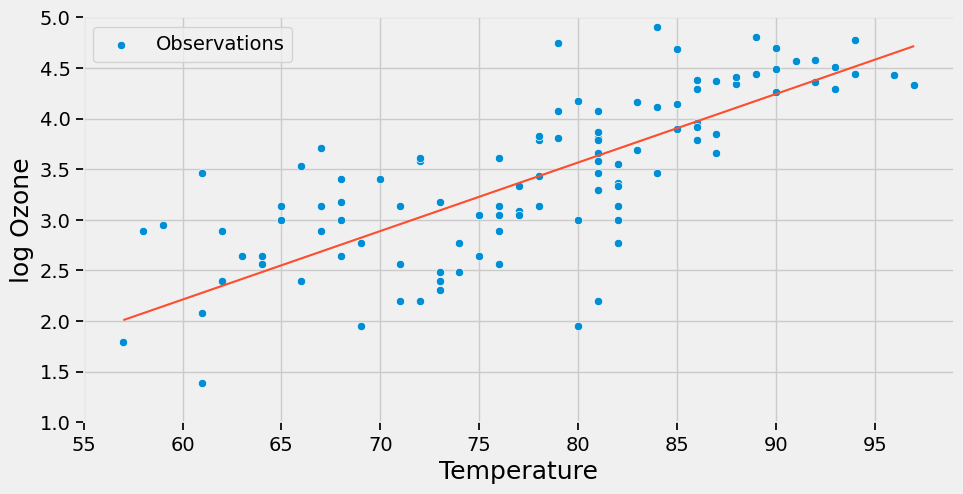

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = air_quality['Temp'], y = np.log(air_quality['Ozone']), label='Observations')
sns.lineplot(x = air_quality['Temp'], y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Temperature', fontsize=18)
ax.set_ylabel('log Ozone', fontsize=18)
ax.set_ylim([1, 5])
ax.legend(fontsize=14)
plt.show()

In [28]:
# Fit a simple linear model
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(air_quality[['Temp']]**2, air_quality[['Ozone']])
y_fitted = linear_model.predict(air_quality[['Temp']]**2)

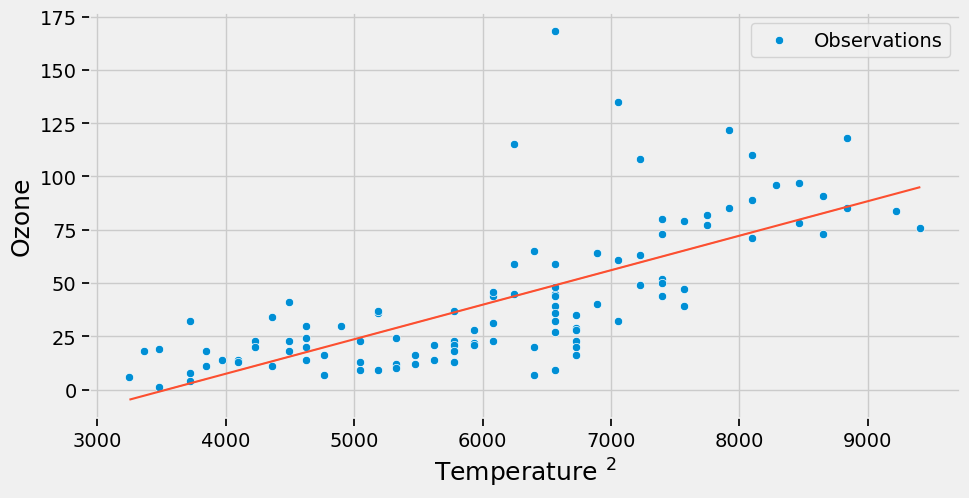

In [29]:
plt.figure(figsize=(10, 5))
ax = sns.scatterplot(x = air_quality['Temp']**2, y = air_quality['Ozone'], label='Observations')
sns.lineplot(x = air_quality['Temp']**2, y = y_fitted.flatten(), 
             color='#fc4f30', ax=ax)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('Temperature $^2$', fontsize=18)
ax.set_ylabel('Ozone', fontsize=18)
#ax.set_ylim([1, 5])
ax.legend(fontsize=14)
plt.show()

<a id='section4'></a>
# Polynomia Features

In [30]:
ice_cream = pd.read_csv('ice_cream.csv')
ice_cream.head()

,sweetness,overall
0,4.1,3.9
1,6.9,5.4
2,8.3,5.8
3,8.0,6.0
4,9.1,6.5


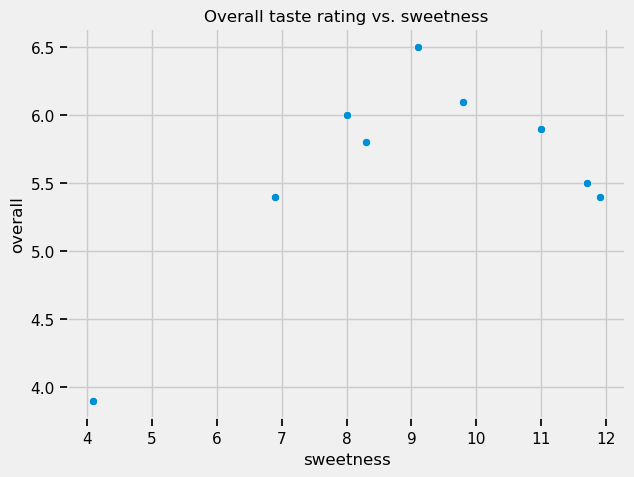

In [31]:
sns.scatterplot(x='sweetness', y='overall', data=ice_cream)
plt.title('Overall taste rating vs. sweetness');

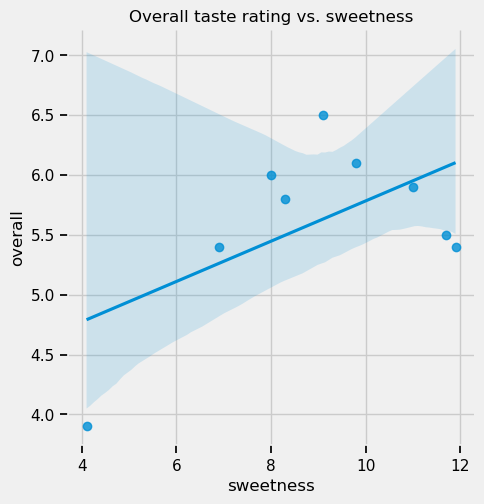

In [35]:
sns.lmplot(x='sweetness', y='overall', data=ice_cream)
plt.title('Overall taste rating vs. sweetness');

In [36]:
transformer = PolynomialFeatures(degree=2)
X = transformer.fit_transform(ice_cream[['sweetness']])
X

array([[  1.  ,   4.1 ,  16.81],
       [  1.  ,   6.9 ,  47.61],
       [  1.  ,   8.3 ,  68.89],
       [  1.  ,   8.  ,  64.  ],
       [  1.  ,   9.1 ,  82.81],
       [  1.  ,   9.8 ,  96.04],
       [  1.  ,  11.  , 121.  ],
       [  1.  ,  11.7 , 136.89],
       [  1.  ,  11.9 , 141.61]])

In [37]:
clf = LinearRegression(fit_intercept=False)
clf.fit(X, ice_cream['overall'])
clf.coef_

array([-1.29862598,  1.60441362, -0.0869569 ])

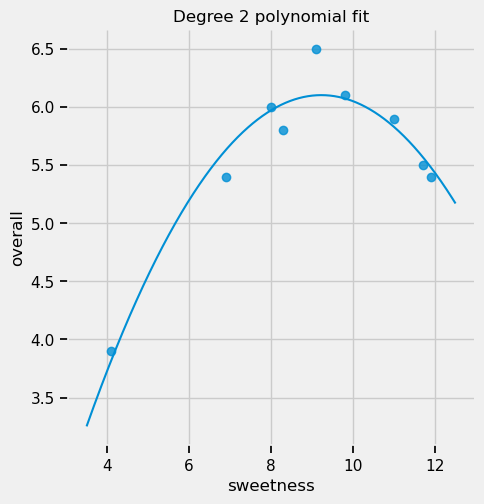

In [38]:
sns.lmplot(x='sweetness', y='overall', data=ice_cream, fit_reg=False)
xs = np.linspace(3.5, 12.5, 1000).reshape(-1, 1)
ys = clf.predict(transformer.transform(xs))
plt.plot(xs, ys)
plt.title('Degree 2 polynomial fit');

In [39]:
second_X = PolynomialFeatures(degree=5).fit_transform(ice_cream[['sweetness']])
pd.DataFrame(data=second_X,
             columns=['bias', 'sweetness', 'sweetness^2', 'sweetness^3',
                      'sweetness^4', 'sweetness^5'])

,bias,sweetness,sweetness^2,sweetness^3,sweetness^4,sweetness^5
0,1.0,4.1,16.81,68.921,282.5761,1158.56201
1,1.0,6.9,47.61,328.509,2266.7121,15640.31349
2,1.0,8.3,68.89,571.787,4745.8321,39390.40643
3,1.0,8.0,64.00,512.000,4096.0000,32768.00000
4,1.0,9.1,82.81,753.571,6857.4961,62403.21451
5,1.0,9.8,96.04,941.192,9223.6816,90392.07968
6,1.0,11.0,121.00,1331.000,14641.0000,161051.00000
7,1.0,11.7,136.89,1601.613,18738.8721,219244.80357
8,1.0,11.9,141.61,1685.159,20053.3921,238635.36599


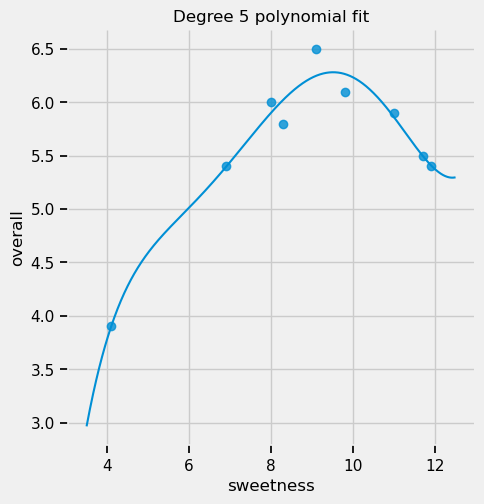

In [40]:
y = ice_cream['overall']
trans_five = PolynomialFeatures(degree=5)
X_five = trans_five.fit_transform(ice_cream[['sweetness']])
clf_five = LinearRegression(fit_intercept=False).fit(X_five, y)

sns.lmplot(x='sweetness', y='overall', data=ice_cream, fit_reg=False)
xs = np.linspace(3.5, 12.5, 1000).reshape(-1, 1)
ys = clf_five.predict(trans_five.transform(xs))
plt.plot(xs, ys)
plt.title('Degree 5 polynomial fit');

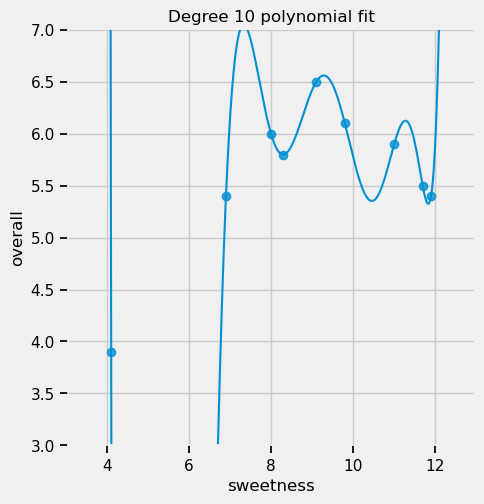

In [41]:
trans_ten = PolynomialFeatures(degree=10)
X_ten = trans_ten.fit_transform(ice_cream[['sweetness']])
clf_ten = LinearRegression(fit_intercept=False).fit(X_ten, y)

sns.lmplot(x='sweetness', y='overall', data=ice_cream, fit_reg=False)
xs = np.linspace(3.5, 12.5, 1000).reshape(-1, 1)
ys = clf_ten.predict(trans_ten.transform(xs))
plt.plot(xs, ys)
plt.title('Degree 10 polynomial fit')
plt.ylim(3, 7);

<a id='section5'></a>
# Datetime

In [43]:
data6 = pd.DataFrame({'date':['01-06-2017',
                              '01-07-2011',
                              '12-07-2003',
                              '21-08-2005',
                              '28-09-2019',
                              '14-10-2020']})
data6['date'] = pd.to_datetime(data6['date'],  dayfirst=True)
data6

,date
0,2017-06-01
1,2011-07-01
2,2003-07-12
3,2005-08-21
4,2019-09-28
5,2020-10-14


In [44]:
data6['year'] = data6['date'].dt.year
data6['month'] = data6['date'].dt.month
data6['day_name'] = data6['date'].dt.day_name()
data6['weekday'] = data6['date'].map(lambda val: val.dayofweek < 5)
data6['quarter'] = data6['date'].dt.quarter
data6

,date,year,month,day_name,weekday,quarter
0,2017-06-01,2017,6,Thursday,True,2
1,2011-07-01,2011,7,Friday,True,3
2,2003-07-12,2003,7,Saturday,False,3
3,2005-08-21,2005,8,Sunday,False,3
4,2019-09-28,2019,9,Saturday,False,3
5,2020-10-14,2020,10,Wednesday,True,4


<a id='section6'></a>
# Text Splitting

In [45]:
titanic = pd.read_csv('titanic.csv')[['Name', 'Sex', 'Age']]
titanic.head()

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0


In [46]:
titanic['Honorifics'] = titanic['Name'].map(lambda val: val.split('.')[0].split()[-1])
titanic.head(15)

,Name,Sex,Age,Honorifics
0,"Braund, Mr. Owen Harris",male,22.0,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Mrs
2,"Heikkinen, Miss. Laina",female,26.0,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Mrs
4,"Allen, Mr. William Henry",male,35.0,Mr
5,"Moran, Mr. James",male,NaN,Mr
6,"McCarthy, Mr. Timothy J",male,54.0,Mr
7,"Palsson, Master. Gosta Leonard",male,2.0,Master
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,Mrs
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,Mrs
